# Cleaning and Analyzing Star Wars survey data using pandas
The goal of this project is to obtain insights from a survey of public opinion concerning the Star Wars movie franchise. The data used can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).
Using pandas makes the process of reading, exploring, cleaning, and analyzing this data easy. 
## Reading the data

In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

As we can see, the columns have long and complicated names, and some values are input in ways that could be simplified. Let's turn the data into something that can be more easily analyzed.
## Cleaning the Data
### Storing redundant row for later
The first row simply repeats the column names for some columns, but also contains critical information about others. Let's remove it from our data while saving its values for later use.

In [4]:
first_row = star_wars.iloc[0]
star_wars = star_wars.iloc[1:]
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Mapping and Renaming Yes/No Columns
The columns asking yes/no questions can have their values transformed to more convenient boolean types, and their columns names to short descriptive ones.

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}

col='Have you seen any of the 6 films in the Star Wars franchise?'
star_wars[col] = star_wars[col].map(yes_no)
col='Do you consider yourself to be a fan of the Star Wars film franchise?'
star_wars[col] = star_wars[col].map(yes_no)
col='Are you familiar with the Expanded Universe?'
star_wars[col] = star_wars[col].map(yes_no)
col='Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦'
star_wars[col] = star_wars[col].map(yes_no)
col='Do you consider yourself to be a fan of the Star Trek franchise?'
star_wars[col] = star_wars[col].map(yes_no)

star_wars = star_wars.rename(columns={
    "Have you seen any of the 6 films in the Star Wars franchise?": "seen_any",
    "Do you consider yourself to be a fan of the Star Wars film franchise?" : "fan",
    'Are you familiar with the Expanded Universe?' : 'eu_familiar',
    'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦' : 'eu_fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?' : 'trek_fan'

})

star_wars.head(3)

,RespondentID,seen_any,fan,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,eu_familiar,eu_fan,trek_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Mapping and renaming "movie seen" Columns
The columns pertaining to which movie the respondent has seen can be mapped to yes/no answers, rather than repeating the name of the movie. These columns can then be renamed to properly reflect their values.

In [6]:
import numpy as np

cols = star_wars.columns[3:9]
sw_map = {
    np.nan: False,
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in cols:
    star_wars[col] = star_wars[col].map(sw_map)

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6",
})
star_wars.head(3)

,RespondentID,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,eu_familiar,eu_fan,trek_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Mapping and renaming movie ranking columns
These columns can be converted to float type and renamed appropriately.

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10" : "ranking_2",
    "Unnamed: 11" : "ranking_3",
    "Unnamed: 12" : "ranking_4",
    "Unnamed: 13" : "ranking_5",
    "Unnamed: 14" : "ranking_6",
})
star_wars.head(3)

,RespondentID,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,eu_familiar,eu_fan,trek_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Cleaning favorite character columns
These columns have their description stored in the first row we saved earlier. In addition, they all contain ordinal string values that can be converted to numerical. Let's first count them, then map them to a scale and rename the columns

In [8]:
star_wars.iloc[:,16].value_counts(dropna=False)

Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int64

In [9]:
sw_map = {
    "Very favorably": 2,
    "Somewhat favorably": 1,
    "Neither favorably nor unfavorably (neutral)": 0,
    "Somewhat unfavorably": -1,
    "Very unfavorably": -2,
    "Unfamiliar (N/A)": np.nan
}

cols = star_wars.columns[15:29]

for col in cols:
    star_wars[col] = star_wars[col].map(sw_map)

col_dict = {}

first_row_relevant_data = first_row.iloc[15:29]

for col_name, char_name in first_row_relevant_data.iteritems():
    col_dict[col_name] = char_name

    
star_wars = star_wars.rename(columns=col_dict)

star_wars.iloc[:,15:29].head(3)
    

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
star_wars.columns

Index(['RespondentID', 'seen_any', 'fan', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6', 'Han Solo', 'Luke Skywalker',
       'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi',
       'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett',
       'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
       'Which character shot first?', 'eu_familiar', 'eu_fan', 'trek_fan',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

## Analyzing the data
Now that the data is ready, we can answer some questions:
* What is the highest rated SW movie?
* What is the most seen SW movie?
* How do these break down by gender?
* Does being a Star Trek fan affect SW opinions?

### Star Wars Movies Average Ranking

Text(0, 0.5, 'Ranking')

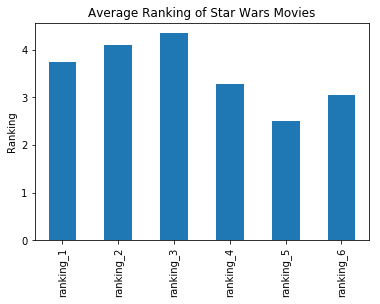

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
star_wars.iloc[:,9:15].mean().plot.bar()
plt.title('Average Ranking of Star Wars Movies')
plt.ylabel('Ranking')

Episode 5, Empire, is correctly rated higher (as a lower number on a scale from first to 6th) on average. Strangely, Jedi (Ep6) is rated lower than Hope (Ep4), despite being worse except for the ending duel (the author's opinion is fact in this case). The prequels are all scored worse than the originals, but strangely Sith is rated worse than Clones, although Clones (Ep2) is the worst movie of the entire franchise.
### Star Wars Movies Most Seen

Text(0.5, 1.0, 'Number of survey takers who have seen the Star Wars Movies')

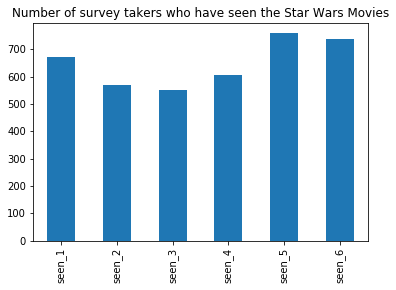

In [12]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()
plt.title('Number of survey takers who have seen the Star Wars Movies')

The prequels were less seen, which explains also why they are less rated, except for phantom being seen more than new hope.
### Star Wars Movies Gender Preferences

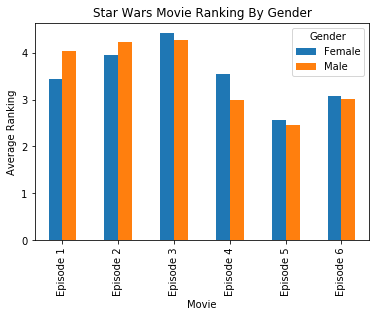

In [222]:
star_wars.groupby(['Gender']).mean().iloc[:,8:14].transpose().plot.bar()
plt.ylabel('Average Ranking')
plt.xlabel('Movie')
plt.title('Star Wars Movie Ranking By Gender')
plt.xticks([0,1,2,3,4,5], ['Episode ' + str(n) for n in range(1,7)]);

#### Observations
* The Original Trilogy (OT, episodes 4 to 6) is prefered by both genders
* Women have a lower opinion of the OT compared to men
* Men have a lower opionion of the Prequel Trilogy (PT, episodes 1 to 3) compared to women, except for episode 3
### Star Wars Movies Gender Views

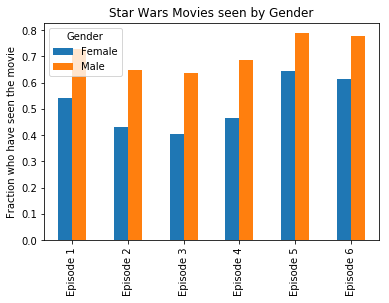

In [15]:
star_wars.groupby(['Gender']).mean().iloc[:,2:8].transpose().plot.bar()
plt.ylabel('Fraction who have seen the movie')
plt.title('Star Wars Movies seen by Gender')
plt.xticks([0,1,2,3,4,5], ['Episode ' + str(n) for n in range(1,7)]);

#### Observations
* Women on general watch the movies much less than men
* This gap is greater for the prequel movies

### Impact of Star Trek fandom on Opinion of Star Wars

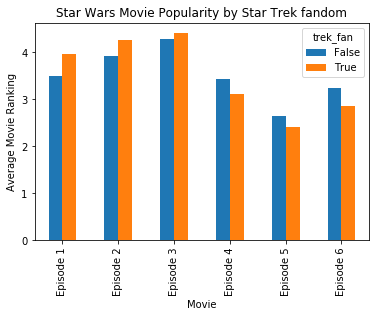

In [224]:
star_wars.groupby(['trek_fan']).mean().iloc[:,8:14].transpose().plot.bar()
plt.ylabel('Average Movie Ranking')
plt.xlabel('Movie')
plt.title('Star Wars Movie Popularity by Star Trek fandom')
plt.xticks([0,1,2,3,4,5], ['Episode ' + str(n) for n in range(1,7)]);

#### Observations
* Non trek fans are more forgiving of the prequels
* Trek fans are more appreciative of the originals

### Favorite characters by gender

Text(0.5, 1.0, 'Star Wars Characters popularity by viewer Gender')

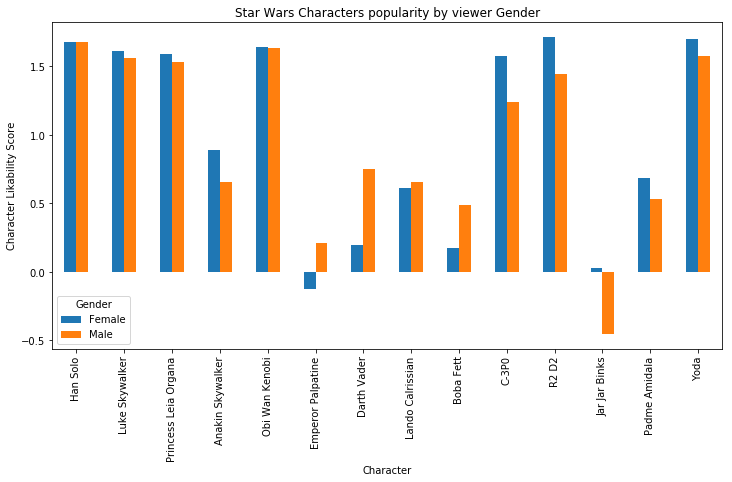

In [225]:
star_wars.groupby(['Gender']).mean().iloc[:,14:28].transpose().plot.bar(figsize=(12,6))
plt.ylabel('Character Likability Score')
plt.xlabel('Character')
plt.title('Star Wars Characters popularity by viewer Gender')

#### Observations
* Males tend to like vilains (Palpatine, Vader, Boba Fett) far more than women
* Nobody likes JarJar
### Favorite characters by Star Trek Fandom

Text(0.5, 1.0, 'Star Wars Characters popularity by Trek Fandom')

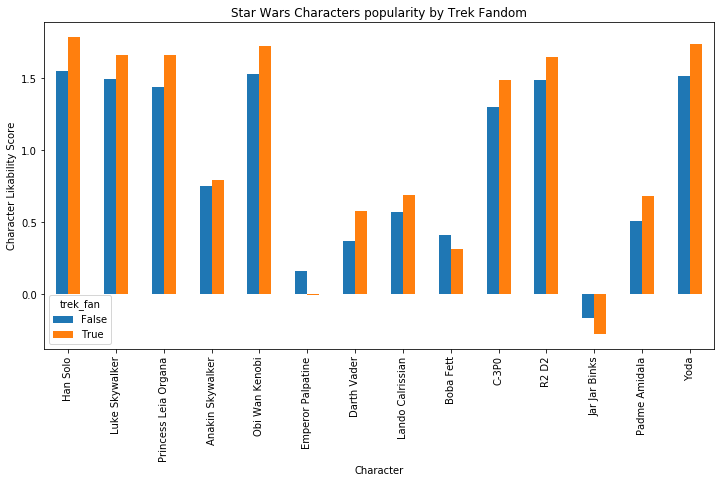

In [226]:
star_wars.groupby(['trek_fan']).mean().iloc[:,14:28].transpose().plot.bar(figsize=(12,6))
plt.ylabel('Character Likability Score')
plt.xlabel('Character')
plt.title('Star Wars Characters popularity by Trek Fandom')

#### Observations
* It seems that Trek fans prefer every character more, at the expense of Palpatine and JarJar

## Conclusion
Using pandas, we were able to easily clean and analyze a messy data set to extract extremely important insights.